# ECE-GY 5373 Lab 9 Network_Security (gk1675)

In [1]:
run ../styles.ipynb

Login to hosts and secure copy from hosts  
```shell
# Romeo
ssh gk1675@pc3.lan.sdn.uky.edu -p 25011
# Juliet
ssh gk1675@pc3.lan.sdn.uky.edu -p 25010
# Router
ssh gk1675@pc3.lan.sdn.uky.edu -p 25012
```

secure copy 
```shell
# secure copy from Romeo
scp -i ~/.ssh/id_rsa -P 25011 gk1675@pc3.lan.sdn.uky.edu:/users/gk1675/*.pcap .
# secure copy from Juliet
scp -i ~/.ssh/id_rsa -P 25010 gk1675@pc3.lan.sdn.uky.edu:/users/gk1675/*.pcap .
```

## Exercise 1: Configuring SNMP

#### Lab report: By default (before your changes to the configuration file), will the SNMP service allow connections from remote hosts? Explain what the effect of your change to the agentAddress option will be.

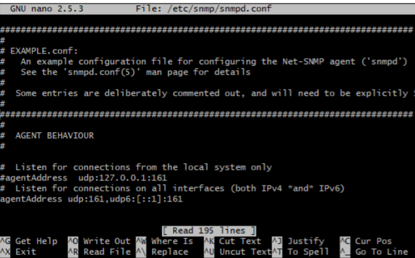

- will the SNMP service allow connections from remote hosts? 
    - No, it will only listen from the local system. 
- the effect of your change to the agentAddress
    - When the agent address is changed, it listens for all connections.

#### Lab report: Explain how the lines
```
view   systemonly  included   .1.3.6.1.2.1.1   
view   systemonly  included   .1.3.6.1.2.1.25.1   
rocommunity public  default    -V systemonly   
```
work together. What MIBs can be read using the "public" community string? What MIBs can be edited using the "public" community string?

For secret string, it can read access control, system and hrSystem groups, and default access to basic system information.  
For public string, the localhost has the full access being read and edited.

#### Lab report: What is the effect of adding the line
```rocommunity secret  10.10.1.0/24```   
to the configuration file?

It give fulls access to host using the community string "secret".

#### Lab report: What is the data type and the description of the MIB objects IF-MIB::ifDescr, IF-MIB::ifInUcastPkts, IF-MIB::ifPhysAddress, and IF-MIB::ifOutUcastPkts?

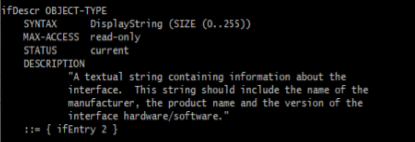

DisplayString   
"A textual string containing information about the
 interface. This string should include the name of the
 manufacturer, the product name and the version of the
 interface hardware/software."

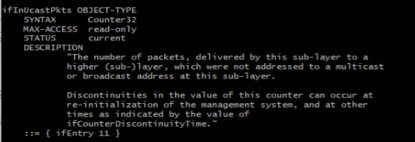

Counter32   
"The number of packets, delivered by this sub-layer to a higher (sub-)layer, which were not addressed to a multicast or broadcast address at this sub-layer.Discontinuities in the value of this counter can occur atre-initialization of the management system, and at othertimes as indicated by the value of if Counter Discontinuity Time."

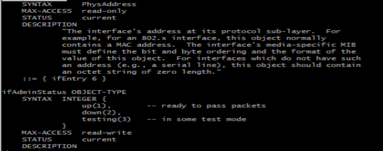

PhysAddress   
"The interface's address at its protocol sub-layer. For
 example, for an 802.x interface, this object normally
 contains a MAC address. The interface's media-specific MIB
 must define the bit and byte ordering and the format of the value of this object. For interfaces which do not have such an address (e.g., a serial line), this object should contain an octet string of zero length."

## Exercise 2: Retrieving SNMP data

#### Lab report: What is the difference in the output when running snmpwalk on the "romeo" host with "public" as the community string, versus "secret" as the community string? Explain why this occurs, using evidence from the SNMP configuration file.

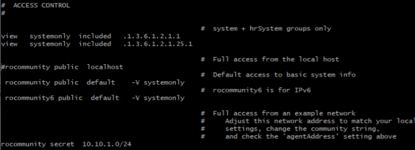

Secret string will get more responses than public string. Because public string has only default access to system information. The secret string has the full access to information.


#### Lab report: What is the difference in the output when running snmpwalk with "secret" as the community string on the "romeo" host, versus on the "juliet" host? Explain why this occurs, using evidence from the SNMP configuration file.

Juliet has no response with secret string, because in the configuration file, only 10.10.1.0/24 has full access. The secret group doesn’t have Juliet’s IP address.

## Exercise 3: Retrieving SNMP data, continued

#### Lab report: Show the relevant section of the ifconfig output on the router, and how it corresponds to the interface information you collected using SNMP.

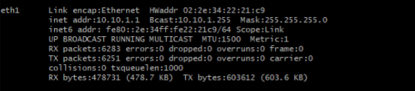

#### Lab report: Draw the format of one of the (successful) SNMP response messages saved, including the name and value of each field.

| Version number  | community	| PDU Type	| Request ID	| Error States	| Error Index	Object |	Value |
| --- | --- | --- | --- | --- | --- | --- |
| 1	| secret | 2(get-response)	| 20701948	| 0(Null)	| 0 |	1.3.6.1.2.1.2.2.1.2.4	| 65746832 |

## Exercise 4

#### Lab report: In the packet capture of the telnet experiment, can you read: the username and password? IP/TCP/Telnet headers? TCP data? Show evidence.

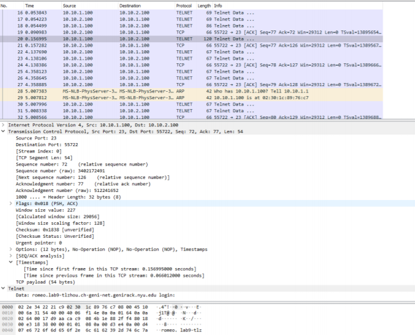

Yes, the username, password, IP/TCP/Telnet headers and TCP data can all be read.

#### Lab report: In the packet capture of the SSH experiment, can you read: the username and password? IP/TCP/SSH headers? TCP data? Show evidence.

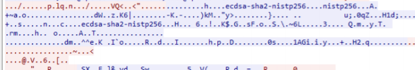

No, the data is encrypted.

#### Lab report: What is the difference between SSH and telnet in their transmission of user IDs, passwords, and other data? Is one more secure than the other and why?

The difference is that SSH encrypts the data transmitted, while telnet does not.
SSH is more secure because the information because SSH is encrypted.

## Exercise 5

#### Lab report: In the packet capture of the FTP experiment, can you read: the username and password? IP/TCP/FTP headers? TCP data? Show evidence.

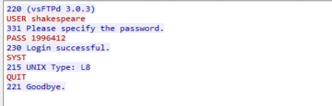

Yes, the username, password, IP/TCP/Telnet headers and TCP data can be read.

#### Lab report: In the packet capture of the SFTP experiment, can you read: the username and password? IP/TCP/SFTP headers? TCP data? Show evidence.

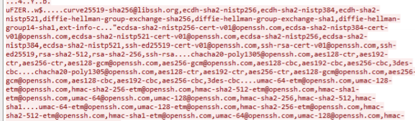

No, the data is encrypted.

#### Lab report: What is the difference between FTP and SFTP in their transmission of user IDs, passwords, and other data? Is one more secure than the other and why?

The difference is that SFTP encrypts the data transmitted, while FTP does not.
SFTP is more secure because the information because SFTP is encrypted.

## Exercise 8

#### Lab report: Can you telnet to the host from the remote machine? Explain.

No, the telnet packets have been dropped.

#### Lab report: From the tcpdump output, how many retries were attempted? Explain the exponential backoff algorithm of TCP timeout and retransmission, using your packet capture.

6 times were attempted. 
The TCP timeout and retransmission are in exponential sequence such as 1,2,4,8,16,32 are its waiting time.

## Exercise 9

#### Lab report: Explain the different between the tcpdump output in this exercise and the previous exercise. How many attempts did TCP make this time?

Only 1 attempt was made this time.
Reject and Drop can send error message back to the host. They can do the same thing here.

---
P.S. Resources on GENI deleted.   
The source code of this notebook is committed to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_5373_Internet_Architecture_and_Protocols)